# Sentiment Analysis of COVID-19 Tweets: When did the Public Panic Set In? Part 3: Exploratory Data Analysis

    Notebook by Allison Kelly - allisonkelly42@gmail.com
    

# Imports

In [30]:
# Generic Imports
import pandas as pd
pd.set_option('display.max_colwidth', 150) # See more text
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk import FreqDist
from ast import literal_eval
from nltk.collocations import *
from nltk.collocations import BigramAssocMeasures

# Training Data EDA

The training data was derived by Sentiment 140, a class project from Stanford University. It is a set of 1,400,000 tweets that are categorized by polarity, where 0 is negative, 2 is neutral, and 4 is positive. The polarity of the tweets was determined by the use of emojis where 'happy' emojis were positive and 'unhappy' emojis were negative. You can find more information and data download <a href="http://help.sentiment140.com/for-students">here.</a>

In [40]:
train_df = pd.read_csv('processed_train.csv', 
                       usecols=['polarity', 'processed_tweets'],
                       converters={"processed_tweets": literal_eval})
train_df.head()

,polarity,processed_tweets
0,0,"[switchfoot, httptwitpiccom, 2y1zl, awww, thats, bummer, shoulda, got, david, carr, third, day]"
1,0,"[upset, cant, update, facebook, texting, might, cry, result, school, today, also, blah]"
2,0,"[kenichan, dived, many, time, ball, managed, save, rest, go, bound]"
3,0,"[whole, body, feel, itchy, like, fire]"
4,0,"[nationwideclass, behaving, im, mad, cant, see]"


In [41]:
train_df.polarity.value_counts()

4    800000
0    800000
Name: polarity, dtype: int64

The value counts of polarity scores reflect that there are no neutral tweets, only positive and negative. From here, we will divide them by their polarity and learn a little bit about the content of each type of tweet. 

In [46]:
neg_tweets = train_df[train_df['polarity'] == 0]
pos_tweets = train_df[train_df['polarity'] == 4]

## Positive Tweets

### Wordcloud

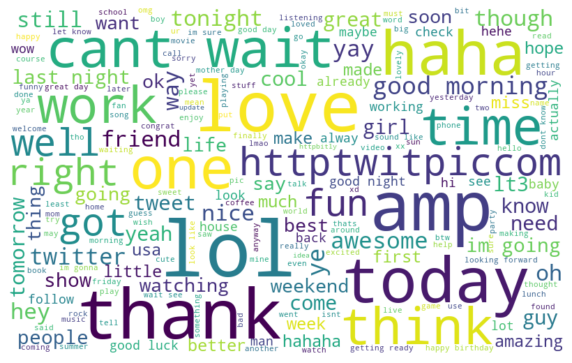

In [48]:
# Combining words from all tweets into one list
all_words_list = [item for sublist in pos_tweets.processed_tweets for item in sublist]

# Combining all words into one string
all_words_string = (" ").join(all_words_list)

# Creating wordcloud
wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state=21, 
                      max_font_size=110, 
                      background_color='white').generate(all_words_string)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Frequency Distributions

In [49]:
freqdist = FreqDist(all_words_list)

# Top 20 words in corpus
freqdist.most_common(20)

[('im', 75234),
 ('good', 60927),
 ('day', 52988),
 ('love', 49556),
 ('get', 38043),
 ('like', 37948),
 ('thanks', 33900),
 ('lol', 33466),
 ('time', 33193),
 ('going', 30655),
 ('u', 30198),
 ('go', 29798),
 ('today', 29220),
 ('got', 27772),
 ('one', 27570),
 ('new', 26642),
 ('know', 26397),
 ('see', 25578),
 ('great', 24889),
 ('well', 24600)]

# COVID Data EDA

In [38]:
tweet_df = pd.read_csv('processed_covid.csv', 
                       usecols=['processed_tweets'], 
                       converters={"processed_tweets": literal_eval})
tweet_df.head()

,processed_tweets
0,"[amazing, timelapse, china, completes, first, two, hospital, wuhan, within, day, bed, medical, staff, treat, infected, #coronavirus, #coronaviruso..."
1,"[bloomberg, scoop, #coronavirus, impact, chinese, oil, demand, said, dropped, three, million, barrel, day, total, consumption, china, world, large..."
2,"[become, ill, worry, stuff, related, existing, gi, issue, coronavirus, saw, email, concerning, visit, provedence, hospitalhome, first, usa, case, ..."
3,"[nprhealth, usa, hospital, unprepared, quickly, spreading, coronavirus]"
4,"[read, zerohedge, piece, coronavirus, phd, mol, bio, doubt, engineered, bioweapon, natural, statistically, improbably, segment, map, completely, d..."


In [23]:
# Combining words from all tweets into one list
all_words_list = [item for sublist in tweet_df.processed_tweets for item in sublist]

# Combining all words into one string
all_words_string = (" ").join(all_words_list)

A preliminary look at the most popular words in all of the tweets can be achieved through a word cloud. 

At first glance, my impression of the tweets is quite negative. "Antichinese," "hospitalization," and "death" are words that stick out to me the most. 

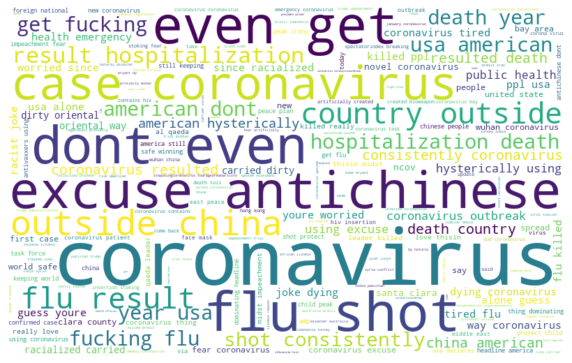

In [24]:
wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state=21, 
                      max_font_size=110, 
                      background_color='white').generate(all_words_string)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Frequency Distributions

NLTK's frequency distribution takes tokens of an entire corpus and shows the number of times each word is used. For this project, I will use all tokens from all tweets as the corpus in which to calculate the frequency distribution.

In [25]:
freqdist = FreqDist(all_words_list)

In [26]:
# Top 20 words in corpus
freqdist.most_common(20)

[('coronavirus', 2207),
 ('#coronavirus', 641),
 ('china', 614),
 ('usa', 537),
 ('flu', 497),
 ('death', 401),
 ('american', 393),
 ('case', 376),
 ('wuhan', 298),
 ('get', 295),
 ('dont', 261),
 ('health', 246),
 ('people', 245),
 ('killed', 241),
 ('country', 240),
 ('virus', 226),
 ('chinese', 221),
 ('even', 215),
 ('outbreak', 214),
 ('excuse', 202)]

In [27]:
len(freqdist)

5879

The total vocabulary of the tweets is 5,879 individual words. 

Below, we'll identify the top 50 words and calculate the percentage of the corpus each word holds.

In [28]:
# Total word count
tweet_word_count = sum(freqdist.values())
top_50_words = freqdist.most_common(50)

print('Word\t\t\tPercentage of Corpus\n')
for word in top_50_words:
    norm_freq = word[1]/tweet_word_count
    print('{} \t\t\t {:.4}'.format(word[0], round(norm_freq*100,2)))

Word			Percentage of Corpus

coronavirus 			 4.96
#coronavirus 			 1.44
china 			 1.38
usa 			 1.21
flu 			 1.12
death 			 0.9
american 			 0.88
case 			 0.85
wuhan 			 0.67
get 			 0.66
dont 			 0.59
health 			 0.55
people 			 0.55
killed 			 0.54
country 			 0.54
virus 			 0.51
chinese 			 0.5
even 			 0.48
outbreak 			 0.48
excuse 			 0.45
using 			 0.45
shot 			 0.45
first 			 0.42
antichinese 			 0.42
year 			 0.4
way 			 0.39
emergency 			 0.38
confirmed 			 0.34
new 			 0.33
public 			 0.33
outside 			 0.33
fucking 			 0.33
result 			 0.32
racist 			 0.31
since 			 0.31
hospitalization 			 0.31
consistently 			 0.31
resulted 			 0.31
hysterically 			 0.31
doctor 			 0.3
fear 			 0.29
impeachment 			 0.28
patient 			 0.28
spread 			 0.28
amp 			 0.26
trump 			 0.25
joke 			 0.25
world 			 0.25
day 			 0.25
youre 			 0.24


## Bigrams

Calculating bigrams will give us the most common word associations in the entire corpus. 

In [31]:
# Instantiate biram measures method
bigram_measures = BigramAssocMeasures()

# Find and then score associations by frequency
tweet_finder = BigramCollocationFinder.from_words(all_words_list)
tweet_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)

# Fifty most common bigrams
tweet_scored[:50]

[(('flu', 'shot'), 0.0043611186044420465),
 (('dont', 'even'), 0.004136318676378024),
 (('even', 'get'), 0.004136318676378024),
 (('excuse', 'antichinese'), 0.004136318676378024),
 (('outside', 'china'), 0.003214638971315529),
 (('country', 'outside'), 0.0030797590144771153),
 (('american', 'dont'), 0.003057279021670713),
 (('american', 'hysterically'), 0.003057279021670713),
 (('china', 'american'), 0.003057279021670713),
 (('consistently', 'coronavirus'), 0.003057279021670713),
 (('coronavirus', 'resulted'), 0.003057279021670713),
 (('death', 'country'), 0.003057279021670713),
 (('death', 'year'), 0.003057279021670713),
 (('flu', 'result'), 0.003057279021670713),
 (('fucking', 'flu'), 0.003057279021670713),
 (('get', 'fucking'), 0.003057279021670713),
 (('hospitalization', 'death'), 0.003057279021670713),
 (('hysterically', 'using'), 0.003057279021670713),
 (('result', 'hospitalization'), 0.003057279021670713),
 (('resulted', 'death'), 0.003057279021670713),
 (('shot', 'consistently'

## Mutual Information Scores

Pointwise mutual information scores quantify the likelihood that two or n- words will co-occur, taking into account the frequency of each word individuallay. This is accomplished by finding the log pobability that both words will occur and dividing by the singular probability that each word will occur: 
<b>PMI(a,b) = log(P(a,b)/P(a)P(b))</b>

In [32]:
tweet_finder.apply_freq_filter(10)

pointwise_mi_score = bigram_measures.pmi
pmi_scored = tweet_finder.score_ngrams(pointwise_mi_score)
print('Pointwise Mutual Information Bigrams\n')
pmi_scored[:20]

Pointwise Mutual Information Bigrams



[(('manufactured', 'chinaccp'), 12.119070805652951),
 (('speaker', 'patrol'), 12.119070805652951),
 (('chinaccp', 'censorship'), 11.981567281903017),
 (('emg', 'buckeyeblue'), 11.981567281903011),
 (('handed', 'transfer'), 11.981567281903011),
 (('transfer', 'request'), 11.981567281903011),
 (('drericding', 'graph'), 11.856036399819157),
 (('equipped', 'speaker'), 11.856036399819157),
 (('seanwhelanrte', 'handed'), 11.856036399819153),
 (('killing', 'cat'), 11.84406375815308),
 (('throwing', 'window'), 11.84406375815308),
 (('baekhyun', 'praised'), 11.74055918239922),
 (('praised', 'adorable'), 11.74055918239922),
 (('san', 'francisco'), 11.74055918239922),
 (('exos', 'baekhyun'), 11.740559182399217),
 (('roryfitz', 'seanwhelanrte'), 11.730505517735295),
 (('owner', 'killing'), 11.718532876069222),
 (('dems', 'wasted'), 11.63364397848271),
 (('opioid', 'overdose'), 11.63364397848271),
 (('summit', 'opioid'), 11.63364397848271)]

In [33]:
mi_likelihood_score = bigram_measures.mi_like
likelihood_scored = tweet_finder.score_ngrams(mi_likelihood_score)
print("Mutual Information Likelihood Bigrams\n")
likelihood_scored[:20]

Mutual Information Likelihood Bigrams



[(('excuse', 'antichinese'), 164.91512680679833),
 (('result', 'hospitalization'), 131.17730496453902),
 (('dont', 'even'), 111.0131693843001),
 (('racialized', 'carried'), 99.0),
 (('even', 'get'), 98.21843121797399),
 (('carried', 'dirty'), 95.15533980582525),
 (('dirty', 'oriental'), 95.15533980582525),
 (('alone', 'guess'), 94.20378640776698),
 (('shot', 'consistently'), 93.41414141414141),
 (('hysterically', 'using'), 91.56435643564356),
 (('santa', 'clara'), 90.01086956521739),
 (('guess', 'youre'), 87.22572815533981),
 (('joke', 'dying'), 83.3661826617407),
 (('youre', 'worried'), 83.1875),
 (('flu', 'shot'), 74.196532731744),
 (('country', 'outside'), 72.88415532879819),
 (('since', 'racialized'), 72.06617647058823),
 (('worried', 'since'), 66.06066176470588),
 (('racist', 'joke'), 62.22258560984994),
 (('using', 'excuse'), 61.64728948142339)]